In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [106]:
df = pd.read_csv('Starbucks_Menu_cat.csv')
df

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
0,나이트로 바닐라 크림,80,10,1,40,2.0,232,콜드브루
1,나이트로 콜드 브루,5,0,0,5,0.0,245,콜드브루
2,돌체 콜드 브루,220,22,6,80,6.0,155,콜드브루
3,리저브 나이트로,5,0,0,0,0.0,190,콜드브루
4,리저브 콜드 브루,5,0,0,0,0.0,190,콜드브루
...,...,...,...,...,...,...,...,...
184,한라봉주스 190ML,88,20,1.0,10,0.0,0,주스(병음료)
185,햇사과 주스 190ML,113,27,0.2,10,0.0,0,주스(병음료)
186,햇사과 주스 591ML,360,84,1.3,20,0.0,0,주스(병음료)
187,딸기 가득 요거트 190ML,155,21,4.0,50,3.2,0,주스(병음료)


In [108]:
print(df['메뉴'])

0          나이트로 바닐라 크림
1           나이트로 콜드 브루
2             돌체 콜드 브루
3             리저브 나이트로
4            리저브 콜드 브루
            ...       
184        한라봉주스 190ML
185       햇사과 주스 190ML
186       햇사과 주스 591ML
187    딸기 가득 요거트 190ML
188     블루베리 요거트 190ML
Name: 메뉴, Length: 189, dtype: object


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   메뉴         189 non-null    object 
 1   칼로리(Kcal)  187 non-null    float64
 2   당류(g)      187 non-null    float64
 3   단백질(g)     187 non-null    float64
 4   나트륨(mg)    187 non-null    float64
 5   포화지방(g)    187 non-null    float64
 6   카페인(mg)    187 non-null    float64
 7   카테고리       189 non-null    object 
dtypes: float64(6), object(2)
memory usage: 11.9+ KB


In [266]:
num_cols = ['칼로리(Kcal)','당류(g)','단백질(g)','나트륨(mg)','포화지방(g)','카페인(mg)']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [268]:
df.describe()

,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg)
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,196.540107,24.090909,3.949198,87.310160,4.999465,77.475936
std,130.399437,15.762937,3.852277,82.854842,5.713599,92.278233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,14.500000,0.000000,10.000000,0.000000,0.000000
50%,198.000000,24.000000,3.000000,75.000000,3.200000,65.000000
75%,290.000000,34.000000,6.000000,150.000000,10.000000,107.500000
max,530.000000,84.000000,14.000000,380.000000,22.000000,680.000000


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   메뉴         189 non-null    object 
 1   칼로리(Kcal)  187 non-null    float64
 2   당류(g)      187 non-null    float64
 3   단백질(g)     187 non-null    float64
 4   나트륨(mg)    187 non-null    float64
 5   포화지방(g)    187 non-null    float64
 6   카페인(mg)    187 non-null    float64
 7   카테고리       189 non-null    object 
dtypes: float64(6), object(2)
memory usage: 11.9+ KB


In [270]:
df.loc[df['칼로리(Kcal)'].idxmax()]

메뉴           인절미 크림 라떼
칼로리(Kcal)        530.0
당류(g)             49.0
단백질(g)            12.0
나트륨(mg)          250.0
포화지방(g)           19.0
카페인(mg)           75.0
카테고리             에스프레소
Name: 57, dtype: object

In [272]:
df.loc[df['카페인(mg)'].idxmax()]

메뉴           시그니처 더 블랙 콜드 브루
칼로리(Kcal)               25.0
당류(g)                    0.0
단백질(g)                   0.0
나트륨(mg)                 50.0
포화지방(g)                  0.0
카페인(mg)                680.0
카테고리                    콜드브루
Name: 11, dtype: object

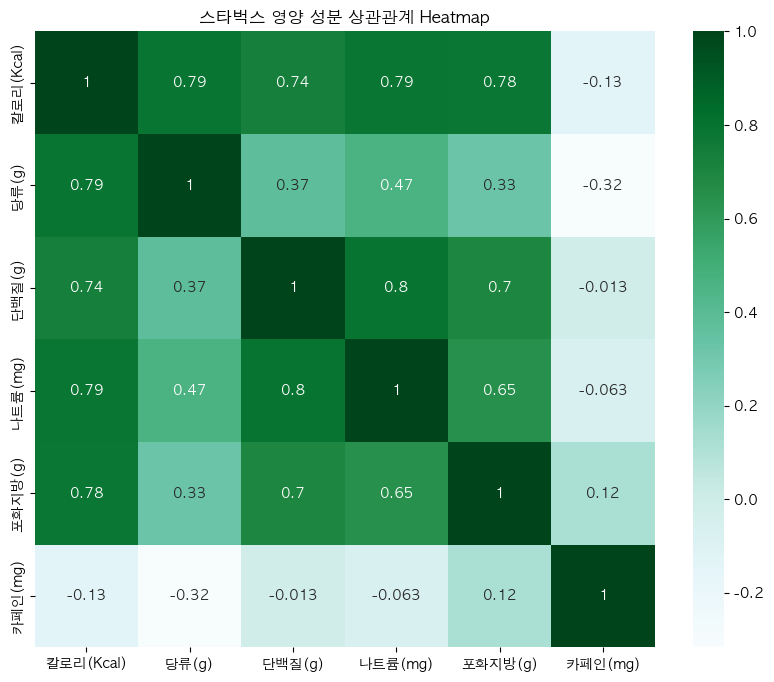

In [274]:
# 전체 영양성분 간 상관관계
nutri_cols = ['칼로리(Kcal)','당류(g)','단백질(g)','나트륨(mg)','포화지방(g)','카페인(mg)']

plt.figure(figsize=(10,8))
sns.heatmap(df[nutri_cols].corr(), annot=True, cmap="BuGn")
plt.title("스타벅스 영양 성분 상관관계 Heatmap")
plt.show()

In [276]:
# 카테고리별 평균 계산
cat_mean = df.groupby('카테고리')[['칼로리(Kcal)','당류(g)','단백질(g)','나트륨(mg)','포화지방(g)','카페인(mg)']].mean()

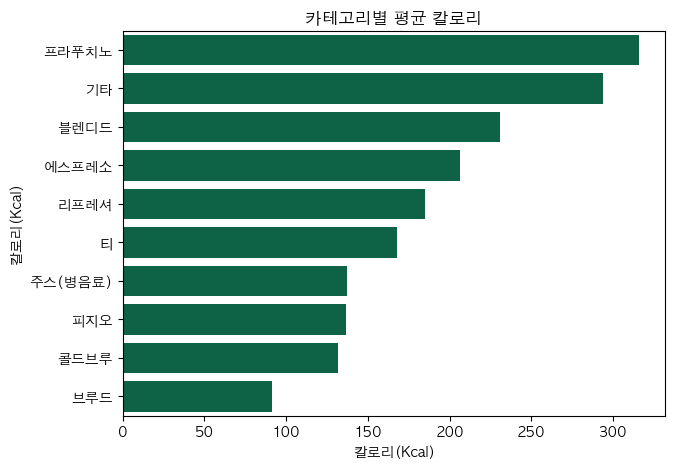

In [278]:
# 막대그래프 (칼로리만)

# 칼로리 내림차순 정렬
cat_sorted = cat_mean.sort_values('칼로리(Kcal)', ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(y=cat_sorted.index, x=cat_sorted['칼로리(Kcal)'], color='#00704A')
plt.title("카테고리별 평균 칼로리")
plt.ylabel("칼로리(Kcal)")
plt.show()

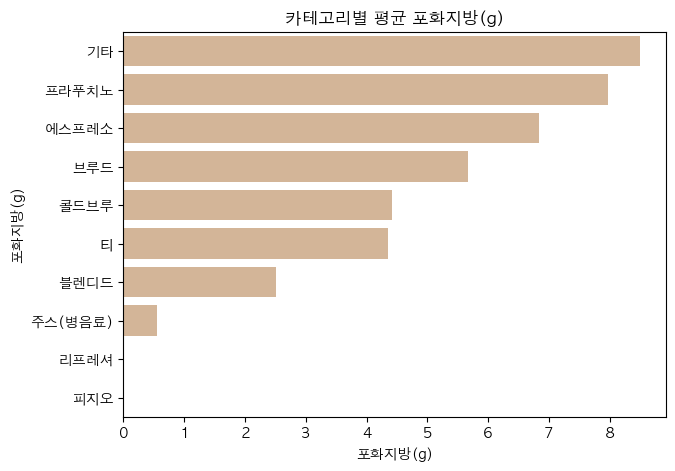

In [280]:
# 막대그래프 (포화 지방)

# 칼로리 내림차순 정렬
cat_sorted = cat_mean.sort_values('포화지방(g)', ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(y=cat_sorted.index, x=cat_sorted['포화지방(g)'], color='#D4A373', alpha = 0.8)
plt.title("카테고리별 평균 포화지방(g)")
plt.ylabel("포화지방(g)")
plt.show()

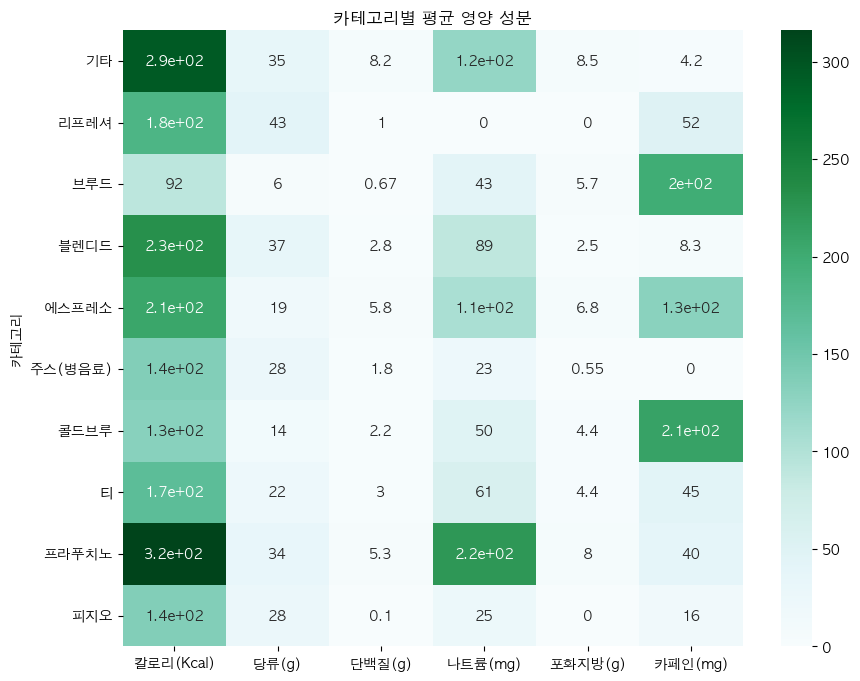

In [282]:
# 카테고리별 평균 영양성분 전체 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(cat_mean, annot=True, cmap="BuGn")
plt.title("카테고리별 평균 영양 성분")
plt.show()

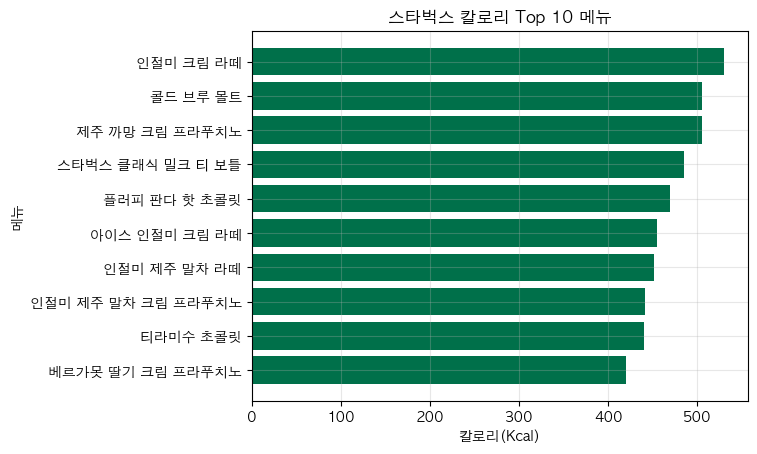

In [284]:
# 전체 음료 중 칼로리 높은 순

top10 = df.sort_values('칼로리(Kcal)', ascending=False).head(10)[::-1]

plt.barh(top10['메뉴'], top10['칼로리(Kcal)'], color='#00704A')
plt.title('스타벅스 칼로리 Top 10 메뉴')
plt.ylabel('메뉴')
plt.xlabel('칼로리(Kcal)')
plt.grid(True, alpha = 0.3)
plt.show()

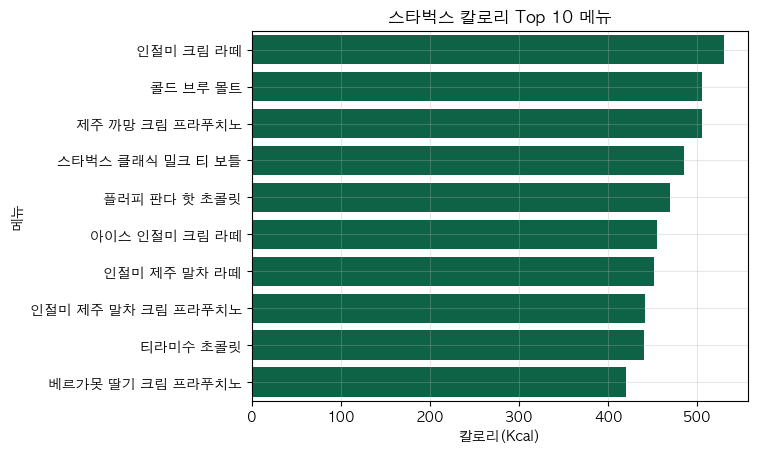

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
57,인절미 크림 라떼,530.0,49.0,12.0,250.0,19.0,75.0,에스프레소
17,콜드 브루 몰트,505.0,41.0,7.0,150.0,20.0,190.0,콜드브루
88,제주 까망 크림 프라푸치노,505.0,48.0,11.0,380.0,8.0,0.0,프라푸치노
149,스타벅스 클래식 밀크 티 보틀,485.0,51.0,7.0,130.0,21.0,195.0,티
169,플러피 판다 핫 초콜릿,470.0,48.0,12.0,160.0,17.0,0.0,기타
55,아이스 인절미 크림 라떼,455.0,43.0,9.0,180.0,16.0,75.0,에스프레소
159,인절미 제주 말차 라떼,452.0,43.0,14.0,240.0,14.0,58.0,티
87,인절미 제주 말차 크림 프라푸치노,442.0,50.0,8.0,330.0,11.0,37.0,프라푸치노
167,티라미수 초콜릿,440.0,44.0,12.0,210.0,15.0,10.0,기타
85,베르가못 딸기 크림 프라푸치노,420.0,50.0,5.0,260.0,13.0,0.0,프라푸치노


In [285]:
top10 = df.sort_values('칼로리(Kcal)', ascending=False).head(10)
sns.barplot(data=top10, x='칼로리(Kcal)', y='메뉴', color='#00704A')
plt.title('스타벅스 칼로리 Top 10 메뉴')
plt.grid(True, alpha = 0.3)
plt.show()
top10

In [286]:
# 칼로리 낮은 순 
low10 = df.sort_values('칼로리(Kcal)', ascending=True).head(10)
low10

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
137,캐모마일 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티
130,얼 그레이 티,0.0,0.0,0.0,0.0,0.0,70.0,티
129,아이스 히비스커스 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티
128,아이스 캐모마일 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티
135,제주 유기농 녹차로 만든 티,0.0,0.0,0.0,0.0,0.0,16.0,티
126,아이스 제주 유기농 녹차로 만든 티,0.0,0.0,0.0,0.0,0.0,16.0,티
125,아이스 잉글리쉬 브렉퍼스트 티,0.0,0.0,0.0,0.0,0.0,40.0,티
123,아이스 유스베리 티,0.0,0.0,0.0,0.0,0.0,20.0,티
133,잉글리쉬 브렉퍼스트 티,0.0,0.0,0.0,0.0,0.0,70.0,티
138,히비스커스 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티


In [288]:
# 카페인 높은 10
top_cf_10 = df.sort_values('카페인(mg)', ascending = False).head(10)
top_cf_10

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
11,시그니처 더 블랙 콜드 브루,25.0,0.0,0.0,50.0,0.0,680.0,콜드브루
6,민트 콜드 브루,100.0,23.0,0.0,0.0,0.0,415.0,콜드브루
16,콜드 브루(Trenta),5.0,0.0,0.0,25.0,0.0,360.0,콜드브루
43,사케라또 비안코 오버 아이스,270.0,14.0,3.0,45.0,18.0,315.0,에스프레소
21,오늘의 커피,5.0,0.0,0.0,15.0,0.0,260.0,브루드
28,코르타도,115.0,8.0,6.0,85.0,3.2,255.0,에스프레소
14,제주 비자림 리저브 콜드 브루,205.0,26.0,8.0,100.0,4.1,250.0,콜드브루
1,나이트로 콜드 브루,5.0,0.0,0.0,5.0,0.0,245.0,콜드브루
0,나이트로 바닐라 크림,80.0,10.0,1.0,40.0,2.0,232.0,콜드브루
45,스타벅스 1호점 크림 라떼,215.0,19.0,2.0,25.0,12.0,210.0,에스프레소


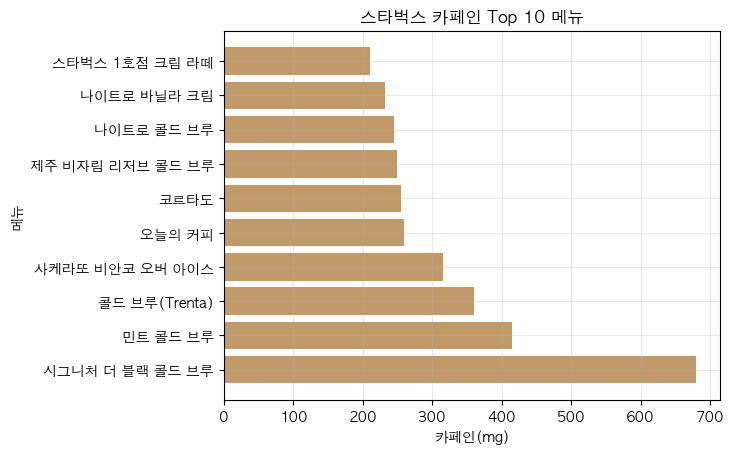

In [292]:
plt.barh(top_cf_10['메뉴'], top_cf_10['카페인(mg)'], color='#C19A6B')
plt.title('스타벅스 카페인 Top 10 메뉴')
plt.ylabel('메뉴')
plt.xlabel('카페인(mg)')
plt.grid(True, alpha = 0.3)
plt.show()

In [294]:
# Low 당류 10
low_sw_10 = df.sort_values('당류(g)',ascending = True).head(10)
low_sw_10

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
30,에스프레소 마키아또,10.0,0.0,0.0,0.0,0.0,75.0,에스프레소
32,아이스 스타벅스 1호점 카페 아메리카노,10.0,0.0,1.0,0.0,0.0,210.0,에스프레소
31,스타벅스 1호점 카페 아메리카노,10.0,0.0,1.0,0.0,0.0,210.0,에스프레소
126,아이스 제주 유기농 녹차로 만든 티,0.0,0.0,0.0,0.0,0.0,16.0,티
29,에스프레소 콘 파나,30.0,0.0,1.0,5.0,2.0,75.0,에스프레소
128,아이스 캐모마일 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티
129,아이스 히비스커스 블렌드 티,0.0,0.0,0.0,0.0,0.0,0.0,티
130,얼 그레이 티,0.0,0.0,0.0,0.0,0.0,70.0,티
131,유스베리 티,0.0,0.0,0.0,0.0,0.0,20.0,티
133,잉글리쉬 브렉퍼스트 티,0.0,0.0,0.0,0.0,0.0,70.0,티


In [314]:
top_포화지방_10 = df.sort_values('포화지방(g)', ascending = False).head(10)
top_포화지방_10

,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),카테고리
39,라벤더 카페 브레베,400.0,30.0,8.0,140.0,22.0,105.0,에스프레소
149,스타벅스 클래식 밀크 티 보틀,485.0,51.0,7.0,130.0,21.0,195.0,티
17,콜드 브루 몰트,505.0,41.0,7.0,150.0,20.0,190.0,콜드브루
57,인절미 크림 라떼,530.0,49.0,12.0,250.0,19.0,75.0,에스프레소
48,아이스 라벤더 카페 브레베,335.0,27.0,6.0,110.0,18.0,105.0,에스프레소
43,사케라또 비안코 오버 아이스,270.0,14.0,3.0,45.0,18.0,315.0,에스프레소
169,플러피 판다 핫 초콜릿,470.0,48.0,12.0,160.0,17.0,0.0,기타
19,HP 코스타리카 TL 아이스 블랙&화이트,265.0,18.0,2.0,105.0,17.0,195.0,브루드
55,아이스 인절미 크림 라떼,455.0,43.0,9.0,180.0,16.0,75.0,에스프레소
168,플러피 판다 아이스 초콜릿,415.0,39.0,11.0,150.0,16.0,0.0,기타


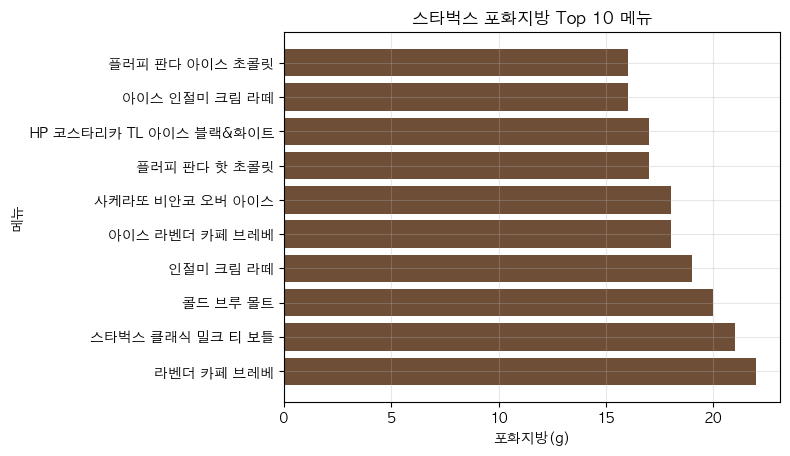

In [324]:
plt.barh(top_포화지방_10['메뉴'], top_포화지방_10['포화지방(g)'], color='#6F4E37')
plt.title('스타벅스 포화지방 Top 10 메뉴')
plt.ylabel('메뉴')
plt.xlabel('포화지방(g)')
plt.grid(True, alpha = 0.3)
plt.show()

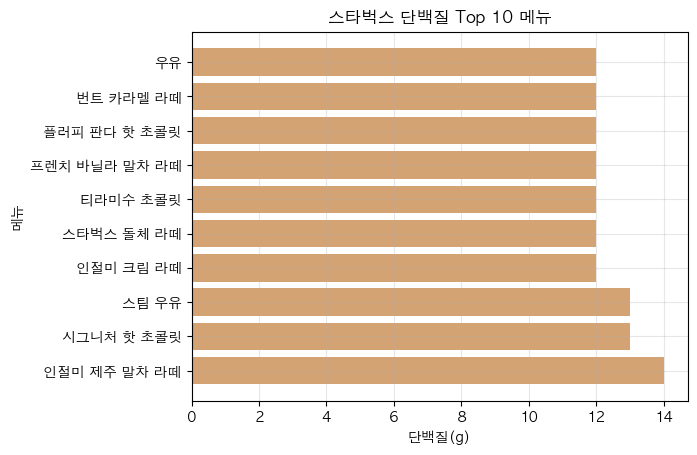

In [328]:
top_단백질_10 = df.sort_values('단백질(g)', ascending = False).head(10)


plt.barh(top_단백질_10['메뉴'], top_단백질_10['단백질(g)'], color='#D4A373')
plt.title('스타벅스 단백질 Top 10 메뉴')
plt.ylabel('메뉴')
plt.xlabel('단백질(g)')
plt.grid(True, alpha = 0.3)
plt.show()

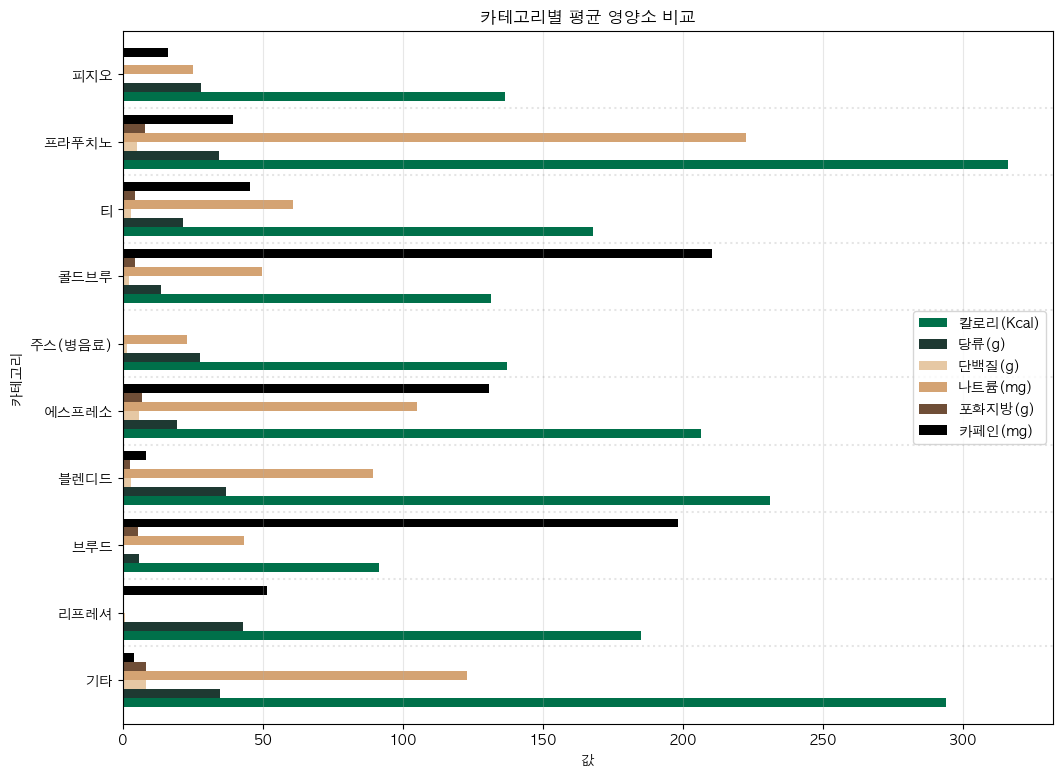

In [312]:
# 카테고리별 평균 영양소 비교

colors = ["#00704A", "#1E3932", "#E6C8A4", "#D4A373", "#6F4E37", "#000000"]

cat_mean.plot(kind='barh',color = colors,  figsize=(12,9), width = 0.8)
plt.title("카테고리별 평균 영양소 비교")
plt.xlabel("값")
plt.ylabel("카테고리")
plt.grid(axis='x', alpha=0.3)
for i in range(len(cat_mean)-1):
    plt.axhline(i + 0.5 , color='gray', linestyle=':', alpha=0.2)

plt.show()
plt.show()

In [332]:
from sklearn.preprocessing import MinMaxScaler

In [334]:
nutri_cols = ['칼로리(Kcal)','당류(g)','포화지방(g)','단백질(g)']

# minmax 스케일링 (0~1)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[nutri_cols] = scaler.fit_transform(df[nutri_cols])

In [336]:
df_scaled['맛점수'] = df_scaled['칼로리(Kcal)'] + df_scaled['당류(g)'] + df_scaled['포화지방(g)']
df_scaled['건강점수'] = (1 - df_scaled['칼로리(Kcal)']) + (1 - df_scaled['당류(g)']) + df_scaled['단백질(g)']

In [342]:
# 맛 점수 & 건강 점수 Top 10 
top10_taste = df_scaled.sort_values('맛점수', ascending=False).head(10)
top10_health = df_scaled.sort_values('건강점수', ascending=False).head(10)

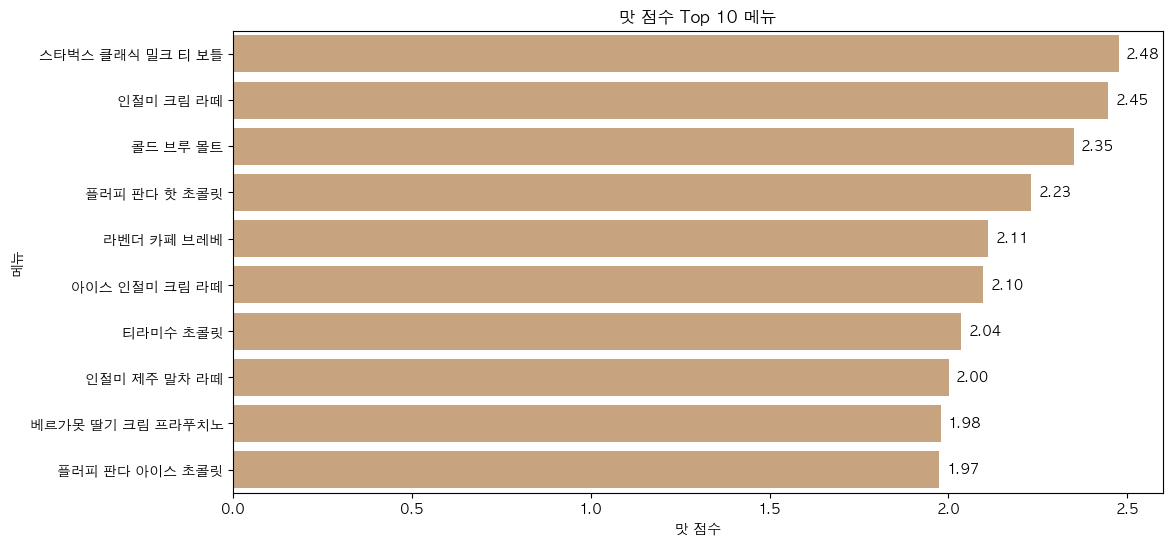

In [352]:
# 맛 점수 Top 10
plt.figure(figsize=(12,6))
sns.barplot(data=top10_taste, x='맛점수', y='메뉴', color='#D4A373')
plt.title("맛 점수 Top 10 메뉴")
plt.xlabel("맛 점수")
plt.ylabel("메뉴")
for i, v in enumerate(top10_taste['맛점수']):
    plt.text(v+0.02, i, f"{v:.2f}", va='center')
plt.show()

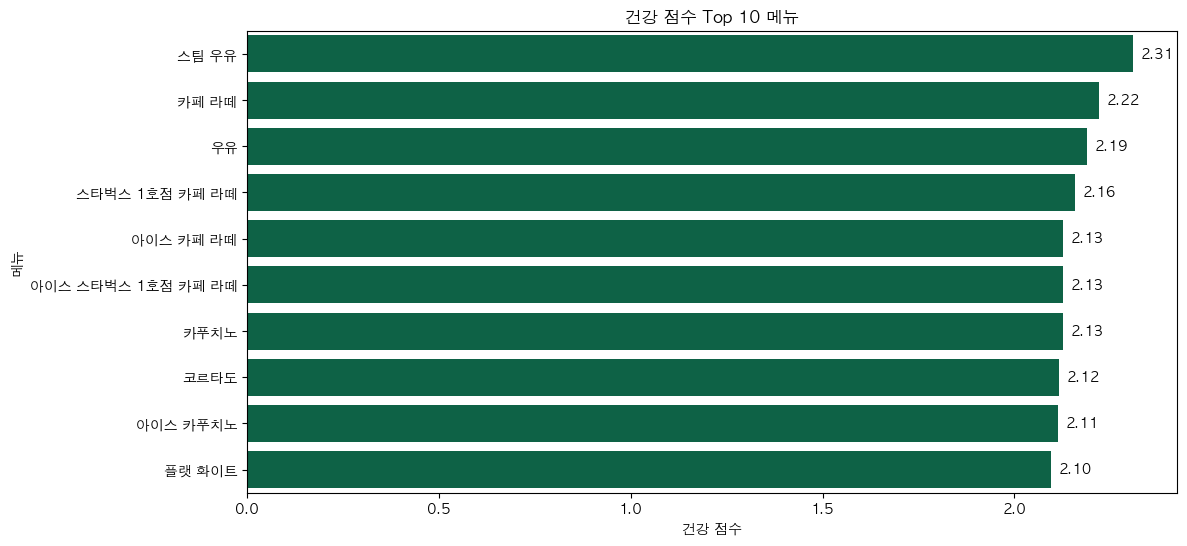

In [350]:
# 건강 점수 Top 10
plt.figure(figsize=(12,6))
sns.barplot(data=top10_health, x='건강점수', y='메뉴', color='#00704A')
plt.title("건강 점수 Top 10 메뉴")
plt.xlabel("건강 점수")
plt.ylabel("메뉴")
for i, v in enumerate(top10_health['건강점수']):
    plt.text(v+0.02, i, f"{v:.2f}", va='center')
plt.show()

In [396]:
!pip install adjustText

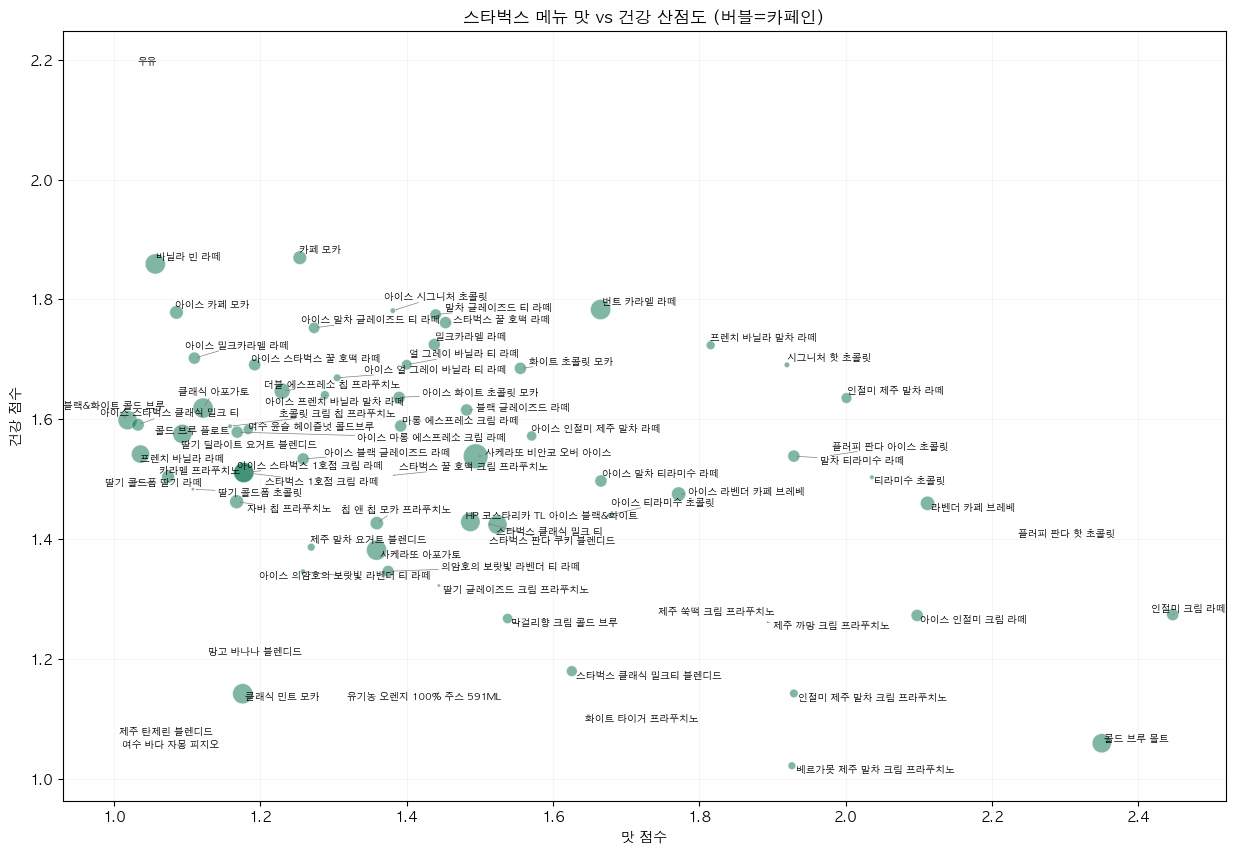

In [420]:
from adjustText import adjust_text
filtered = df_scaled[(df_scaled['맛점수']>1) & (df_scaled['건강점수']>1)]

plt.figure(figsize=(15,10))
plt.scatter(filtered['맛점수'], filtered['건강점수'],
            s=filtered['카페인(mg)'], alpha=0.5, 
            color='#00704A', edgecolor='white', linewidth=0.5)


texts = []
for i, row in filtered.iterrows():
    texts.append(plt.text(row['맛점수'], row['건강점수'], row['메뉴'], fontsize=7))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

plt.xlabel("맛 점수")
plt.ylabel("건강 점수")
plt.title("스타벅스 메뉴 맛 vs 건강 산점도 (버블=카페인)")
plt.grid(alpha=0.1)
plt.show()

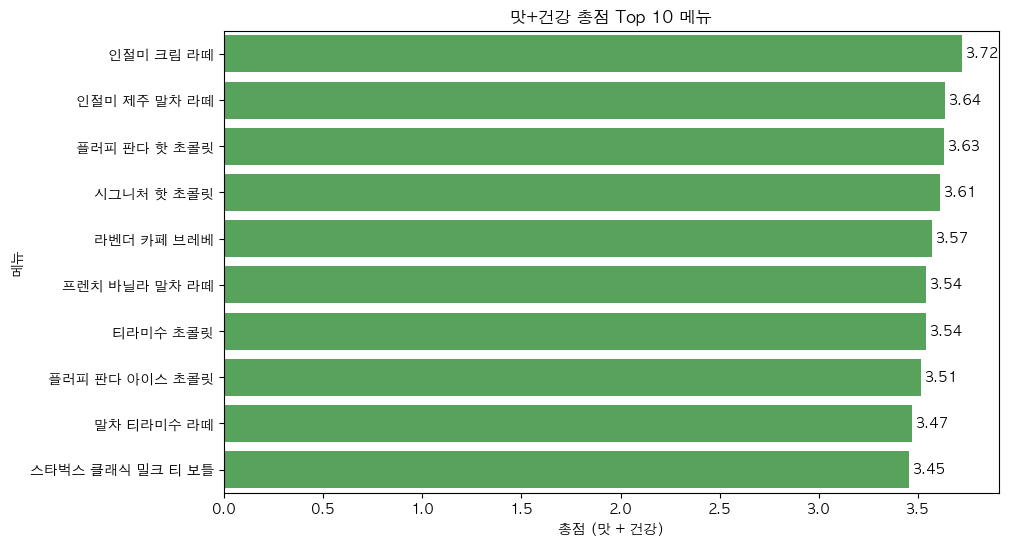

In [460]:
nutri_cols = ['칼로리(Kcal)','당류(g)','포화지방(g)','단백질(g)']

# minmax 스케일링 (0~1)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[nutri_cols] = scaler.fit_transform(df[nutri_cols])

df_scaled['맛점수'] = df_scaled['칼로리(Kcal)'] + df_scaled['당류(g)'] + df_scaled['포화지방(g)']
df_scaled['건강점수'] = (1 - df_scaled['칼로리(Kcal)']) + (1 - df_scaled['당류(g)']) + df_scaled['단백질(g)']

# 맛점수 + 건강점수 합산
df_scaled['총점'] = df_scaled['맛점수'] + df_scaled['건강점수']

# 총점 기준 Top 10
top10_total = df_scaled.sort_values('총점', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_total, x='총점', y='메뉴', color='#4CAF50')
plt.title("맛+건강 총점 Top 10 메뉴")
plt.xlabel("총점 (맛 + 건강)")
plt.ylabel("메뉴")

# 점수 표시
for i, v in enumerate(top10_total['총점']):
    plt.text(v+0.02, i, f"{v:.2f}", va='center')

plt.show()

In [462]:
# Top 10 메뉴의 영양성분만 표시
# 원본 df (정규화 전 값)에서 영양소 가져오기
cols_raw = ['메뉴','칼로리(Kcal)','당류(g)','단백질(g)','나트륨(mg)','포화지방(g)','카페인(mg)']

# Top 10 인덱스에 해당하는 원본 영양소 + 점수 합치기
top10_nutri_raw = df.loc[top10_total.index, cols_raw]
top10_nutri_raw = pd.concat([top10_nutri_raw.reset_index(drop=True),
                             top10_total[['맛점수','건강점수','총점']].reset_index(drop=True)], axis=1)

top10_nutri_raw


,메뉴,칼로리(Kcal),당류(g),단백질(g),나트륨(mg),포화지방(g),카페인(mg),맛점수,건강점수,총점
0,인절미 크림 라떼,530.0,49.0,12.0,250.0,19.0,75.0,2.446970,1.273810,3.720779
1,인절미 제주 말차 라떼,452.0,43.0,14.0,240.0,14.0,58.0,2.001099,1.635265,3.636364
2,플러피 판다 핫 초콜릿,470.0,48.0,12.0,160.0,17.0,0.0,2.230948,1.398922,3.629870
3,시그니처 핫 초콜릿,410.0,39.0,13.0,135.0,15.0,15.0,1.919689,1.690701,3.610390
4,라벤더 카페 브레베,400.0,30.0,8.0,140.0,22.0,105.0,2.111860,1.459569,3.571429
5,프렌치 바닐라 말차 라떼,380.0,35.0,12.0,250.0,15.0,40.0,1.815466,1.723495,3.538961
6,티라미수 초콜릿,440.0,44.0,12.0,210.0,15.0,10.0,2.035816,1.503145,3.538961
7,플러피 판다 아이스 초콜릿,415.0,39.0,11.0,150.0,16.0,0.0,1.974577,1.538410,3.512987
8,말차 티라미수 라떼,415.0,39.0,11.0,230.0,15.0,75.0,1.929123,1.538410,3.467532
9,스타벅스 클래식 밀크 티 보틀,485.0,51.0,7.0,130.0,21.0,195.0,2.476783,0.977763,3.454545


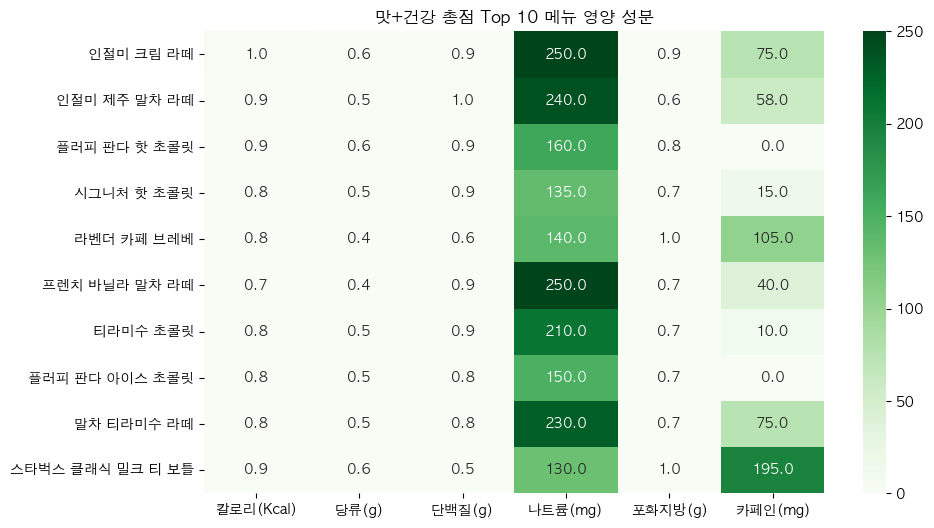

In [468]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(top10_total[['칼로리(Kcal)','당류(g)','단백질(g)','나트륨(mg)','포화지방(g)','카페인(mg)']],
            annot=True, fmt=".1f", cmap="Greens", 
            yticklabels=top10_total['메뉴'])
plt.title("맛+건강 총점 Top 10 메뉴 영양 성분")
plt.show()

In [438]:
# 균형 잡힌 메뉴군
cat_counts = top10_total['카테고리'].value_counts()

print(cat_counts)

카테고리
티        4
기타       4
에스프레소    2
Name: count, dtype: int64


/var/folders/6k/dlkkcbqx1w9dyp5b6cz7zhg00000gn/T/ipykernel_50149/1479415339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cat_counts.values, y = cat_counts.index, palette = colors, alpha = 0.8)


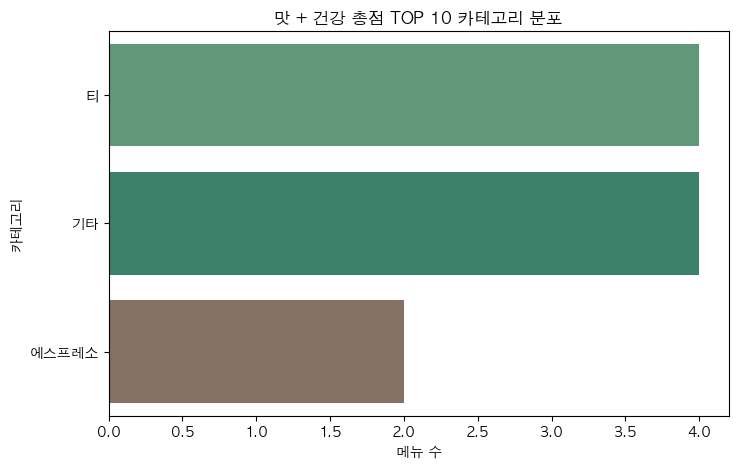

In [452]:
plt.figure(figsize=(8,5))
colors = ['#2E8B57', '#00704A', '#6F4E37']
sns.barplot(x = cat_counts.values, y = cat_counts.index, palette = colors, alpha = 0.8)
plt.title('맛 + 건강 총점 TOP 10 카테고리 분포')
plt.xlabel('메뉴 수')
plt.ylabel('카테고리')
plt.show()